In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [23]:
emails = pd.read_csv('emails.csv', names=['category', 'message'], skiprows=1)
emails

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
emails.message.sample().values

array(['our mobile number has won £5000, to claim calls us back or ring the claims hot line on 09050005321.'],
      dtype=object)

In [30]:
emails.message.sample(10).values

array(['Call me when u finish then i come n pick u.',
       'Eh den sat u book e kb liao huh...',
       'Is there any training tomorrow?',
       'EASTENDERS TV Quiz. What FLOWER does DOT compare herself to? D= VIOLET E= TULIP F= LILY txt D E or F to 84025 NOW 4 chance 2 WIN £100 Cash WKENT/150P16+',
       "Yup but it's not giving me problems now so mayb i'll jus leave it...",
       'May i call You later Pls',
       'This weeks SavaMob member offers are now accessible. Just call 08709501522 for details! SavaMob, POBOX 139, LA3 2WU. Only £1.50/week. SavaMob - offers mobile!',
       'Somebody should go to andros and steal ice',
       'I like you peoples very much:) but am very shy pa.',
       'hanks lotsly!'], dtype=object)

In [28]:
emails.category.value_counts()

category
ham     4825
spam     747
Name: count, dtype: int64

In [29]:
emails.category.value_counts()/len(emails)

category
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [32]:
emails.loc[0].message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [34]:
emails.message.str.len().value_counts()

message
22     117
24      99
32      98
23      95
26      88
      ... 
300      1
363      1
375      1
431      1
273      1
Name: count, Length: 276, dtype: int64

In [41]:
len(emails.message[emails.message.str.len() == 22].unique())

85

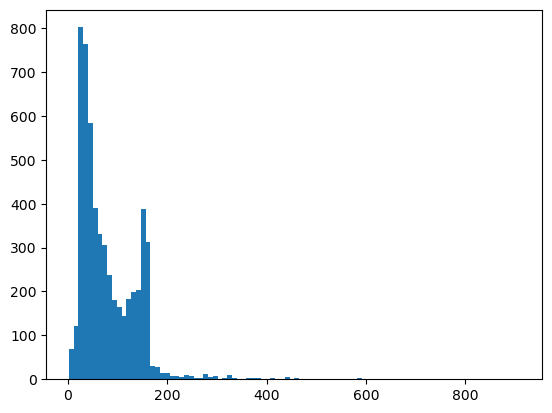

In [43]:
plt.hist(emails.message.str.len(), bins = 'fd')
plt.show()

What we observe is a bimodal distribution with strong positive asymmetry.
bins='fd' - automatic bins


In [44]:
emails.message.str.len().skew()

2.5068062602153236

In [50]:
Counter(emails.loc[0].message.lower().split(' '))

Counter({'go': 1,
         'until': 1,
         'jurong': 1,
         'point,': 1,
         'crazy..': 1,
         'available': 1,
         'only': 1,
         'in': 1,
         'bugis': 1,
         'n': 1,
         'great': 1,
         'world': 1,
         'la': 1,
         'e': 1,
         'buffet...': 1,
         'cine': 1,
         'there': 1,
         'got': 1,
         'amore': 1,
         'wat...': 1})

```python
from sklearn.feature_extraction.text import CountVectorizer
```
Feature extraction is the proccess which from non-number data extract data which is numbers. This also make normalization, lower(), removing special carracters and make them uniform, tokenization (split by words) and will give count of all words from all available messages

In [56]:
counter = CountVectorizer(strip_accents='unicode')

In [57]:
counter.fit(emails.message)

CountVectorizer(strip_accents='unicode')

In [64]:
counter.vocabulary_

{'go': 3567,
 'until': 8080,
 'jurong': 4370,
 'point': 5953,
 'crazy': 2334,
 'available': 1313,
 'only': 5566,
 'in': 4110,
 'bugis': 1763,
 'great': 3651,
 'world': 8544,
 'la': 4497,
 'buffet': 1761,
 'cine': 2057,
 'there': 7689,
 'got': 3611,
 'amore': 1079,
 'wat': 8320,
 'ok': 5533,
 'lar': 4533,
 'joking': 4338,
 'wif': 8446,
 'oni': 5562,
 'free': 3369,
 'entry': 2959,
 'wkly': 8502,
 'comp': 2174,
 'to': 7801,
 'win': 8459,
 'fa': 3096,
 'cup': 2394,
 'final': 3217,
 'tkts': 7788,
 '21st': 410,
 'may': 4955,
 '2005': 401,
 'text': 7639,
 '87121': 791,
 'receive': 6335,
 'question': 6227,
 'std': 7274,
 'txt': 7981,
 'rate': 6279,
 'apply': 1166,
 '08452810075over18': 77,
 'dun': 2811,
 'say': 6674,
 'so': 7069,
 'early': 2832,
 'hor': 3948,
 'already': 1051,
 'then': 7683,
 'nah': 5266,
 'don': 2720,
 'think': 7704,
 'he': 3801,
 'goes': 3575,
 'usf': 8126,
 'lives': 4688,
 'around': 1217,
 'here': 3852,
 'though': 7724,
 'freemsg': 3376,
 'hey': 3862,
 'darling': 2451,
 'it

In [70]:
word_counts = counter.transform(emails.message)

In [71]:
model = MultinomialNB()
model.fit(word_counts, emails.category)

MultinomialNB()

Fitting a model and checking the score

In [72]:
model.score(word_counts, emails.category)

0.9935391241923905